In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 4.7 Hierarchical Clustering

Goal: construct dendogram based on:
- Dissimilarity measure (e.g. Euclidean)
- Linkage type (complete, single, average)

Stopping criteria: 1 cluster left.

Once the dendogram has been constructed, we need to cut it at an appropriate level to obtain a clustering.

140 by 2 prdataset with 1 class: [140]


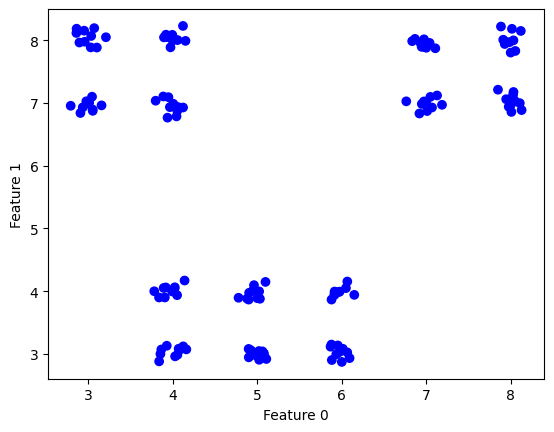

In [3]:
ds = pr.read_mat('hall')    # artificial data set with clear structure
print(ds)
pr.scatterd(ds)

# Below we see 14 clusters at finest level, but organized into 3 larger clusters.
# The appropriate number of clusters depends on the application.

Below we will hierarchically cluster the `rnd` dataset which does not have a clear structure, to get an idea of what the dendodram looks like.

200 by 2 prdataset with 1 class: [200]


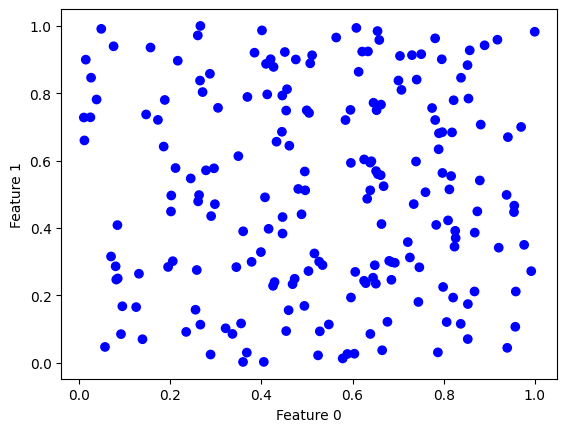

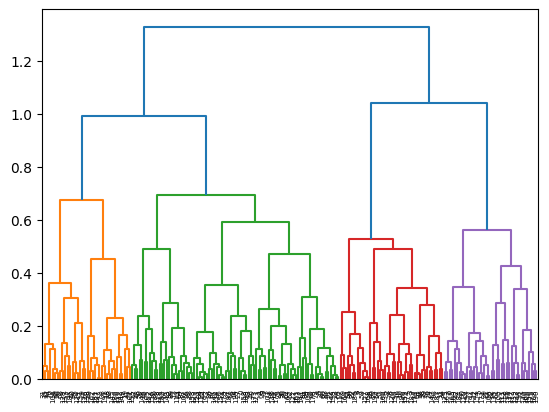

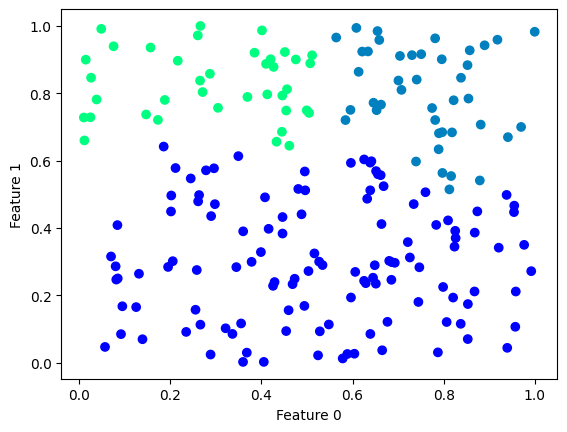

In [14]:
ds = pr.read_mat('rnd') # ds with no clear structure
print(ds)   
pr.scatterd(ds)

# Plot dendogram with complete linkage
pr.dendro(+ds, 'complete')

# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'complete', 3)   # obtain 3 clusters
# NOTE: complete and avg linkage lead to round clusters, whereas single linkage is good for elongated clusters

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)

Perform hierarchical clustering on the `hall` dataset - having clear structure.

What do the lengths of the vertical stems in the dendogram tell us about the clustering?

140 by 2 prdataset with 1 class: [140]


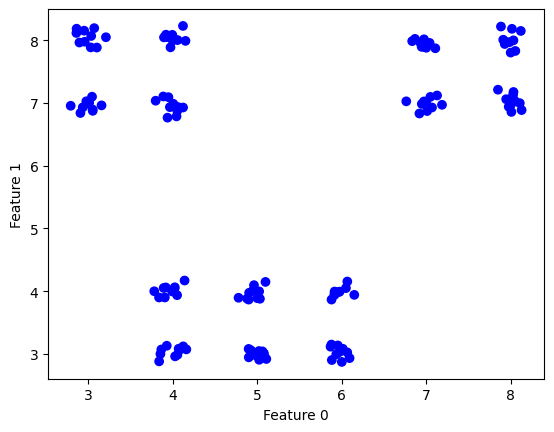

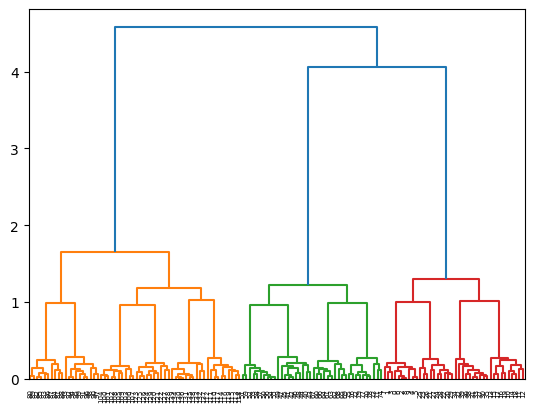

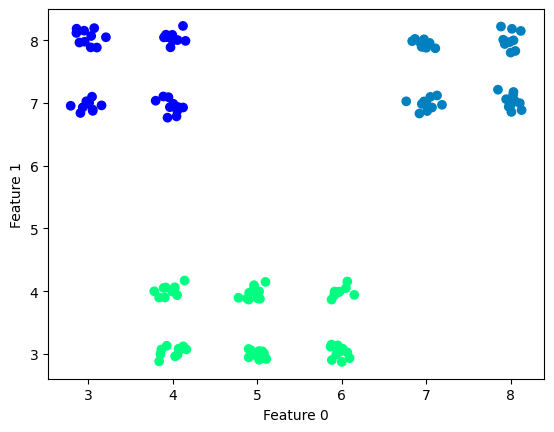

In [24]:
ds = pr.read_mat('hall')  
print(ds)
pr.scatterd(ds)

# Plot dendogram with complete linkage
# NOTE: long stems in the dendogram indicate large distances between clusters, i.e. good point to cut
# NOTE: in single linkage, we can clearly distinguish 2 different stem lengths
pr.dendro(+ds, 'average')

# Obtain distance/dissimilarity matrix D to pass to hclust
D = ds * pr.proxm(ds, ('eucl'))   # other distances: 'city' ...

# Perform hierarchical clustering with complete linkage
lab = pr.hclust(D, 'average', 3)   # obtain 3 clusters, i.e. cut the dendogram at height 3

# Relabel original data with new labels
ds_new = pr.prdataset(+ds, lab)
pr.scatterd(ds_new)
